In [4]:
import numpy as np
import pandas as pd
import matplotlib
from tqdm import tqdm 
from sklearn import metrics 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [5]:
all_dir = [x[0] for x in os.walk('.')]
set_dirs = []
for dir in all_dir:
    if len(dir.split('/')) == 3:
        set_dirs.append(dir)

In [15]:
ensemble_df_list = []
for set_dir in set_dirs:
    ensemble_df = pd.read_csv(set_dir + '/ensemble.csv')
    ensemble_df_list.append(ensemble_df)

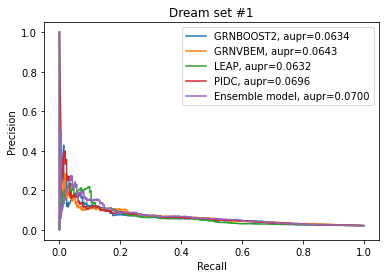

<Figure size 432x288 with 0 Axes>

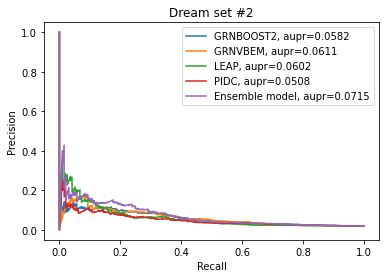

<Figure size 432x288 with 0 Axes>

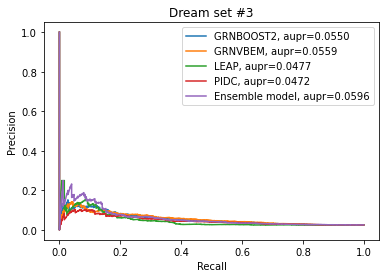

<Figure size 432x288 with 0 Axes>

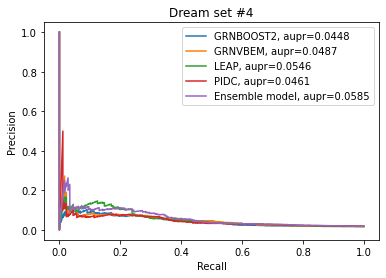

<Figure size 432x288 with 0 Axes>

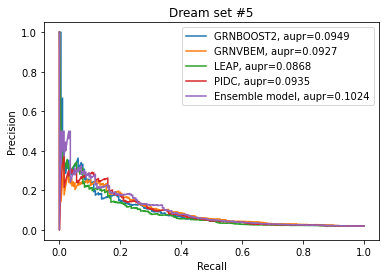

<Figure size 432x288 with 0 Axes>

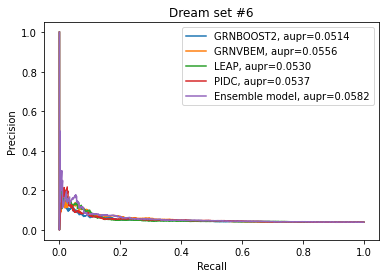

<Figure size 432x288 with 0 Axes>

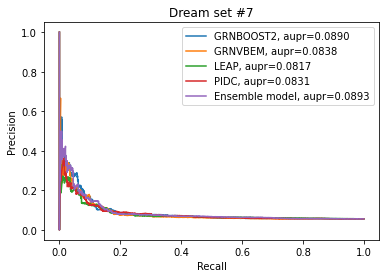

<Figure size 432x288 with 0 Axes>

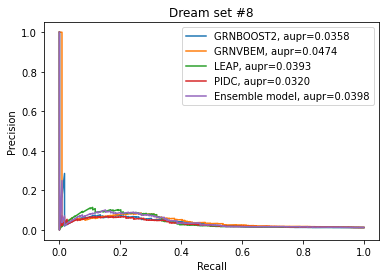

<Figure size 432x288 with 0 Axes>

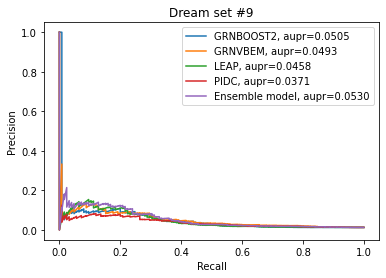

<Figure size 432x288 with 0 Axes>

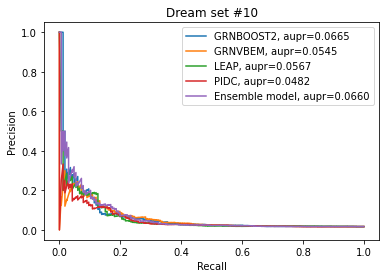

<Figure size 432x288 with 0 Axes>

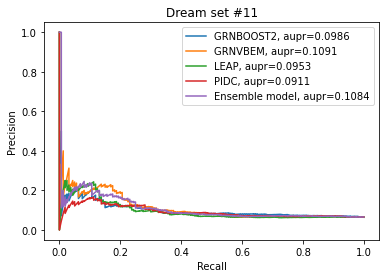

<Figure size 432x288 with 0 Axes>

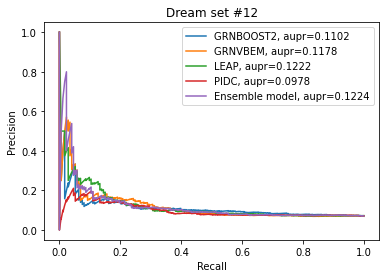

<Figure size 432x288 with 0 Axes>

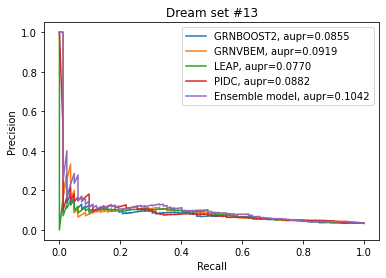

<Figure size 432x288 with 0 Axes>

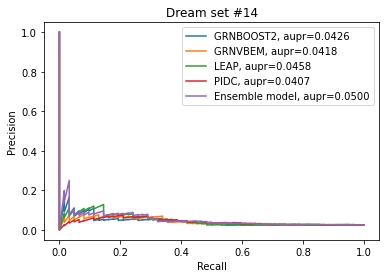

<Figure size 432x288 with 0 Axes>

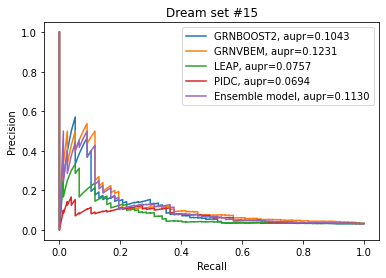

<Figure size 432x288 with 0 Axes>

In [16]:
for i in range(15):
    test_ensemble = ensemble_df_list[i]
    train_ensemble = pd.DataFrame(columns=test_ensemble.columns)
    for index, ensemble_df in enumerate(ensemble_df_list):
        if (index != i):
            train_ensemble = pd.concat([train_ensemble,ensemble_df])
    min_max_scaler = preprocessing.MinMaxScaler()
    # train on all other dream sets' ranking results, validation on current set
    X_train = train_ensemble[['SCRIBE','GENIE3','PPCOR','GRNVBEM','SCODE','PIDC','LEAP','GRISLI','GRNBOOST2','SINCERITIES']].values 
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = test_ensemble[['SCRIBE','GENIE3','PPCOR','GRNVBEM','SCODE','PIDC','LEAP','GRISLI','GRNBOOST2','SINCERITIES']].values 
    X_test = min_max_scaler.fit_transform(X_test)
    train_ensemble = train_ensemble.astype({'edge_exist': 'int8'})
    test_ensemble = test_ensemble.astype({'edge_exist': 'int8'})
    y_train = train_ensemble['edge_exist']
    y_test = test_ensemble['edge_exist']
    # We can train a different model here, neural net, random forest, etc.
    clf = LogisticRegressionCV(cv=5, random_state=42).fit(X_train, y_train)
    ensemble_pr = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])
    genie3_pr = precision_recall_curve(y_test, test_ensemble['GENIE3'])
    grnboost_pr = precision_recall_curve(y_test, test_ensemble['GRNBOOST2'])
    leap_pr = precision_recall_curve(y_test, test_ensemble['LEAP'])
    pidc_pr = precision_recall_curve(y_test, test_ensemble['PIDC'])
    fig, ax = plt.subplots()
    ax.plot(grnboost_pr[1], grnboost_pr[0], label='GRNBOOST2, aupr='+"{:.4f}".format(auc(grnboost_pr[1], grnboost_pr[0])))
    ax.plot(genie3_pr[1], genie3_pr[0], label='GRNVBEM, aupr='+"{:.4f}".format(auc(genie3_pr[1], genie3_pr[0])))
    ax.plot(leap_pr[1], leap_pr[0], label='LEAP, aupr='+"{:.4f}".format(auc(leap_pr[1], leap_pr[0])))
    ax.plot(pidc_pr[1], pidc_pr[0], label='PIDC, aupr='+"{:.4f}".format(auc(pidc_pr[1], pidc_pr[0])))
    ax.plot(ensemble_pr[1], ensemble_pr[0], label='Ensemble model, aupr='+"{:.4f}".format(auc(ensemble_pr[1], ensemble_pr[0])))
    plt.title("Dream set #" +str(i+1))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc='upper right')
    plt.show()
    # plt.savefig(str(i+1)+'.png')